# Neural Network for testing effects of different hyperparameters

## Setup

In [ ]:
#Imports go here
import torch
import torch.nn as nn
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from tqdm import notebook
import time

In [ ]:
torch.set_printoptions(linewidth=120)

In [ ]:
# Some hyperparameters
batch_size = 100
kernel = [3, 5, 7]
num_classes = 10
num_epochs = 5
learning_rate = [0.00025, 0.001, 0.00175]

In [ ]:
#Download the dataset
train_dataset = torchvision.datasets.FashionMNIST(root='data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.FashionMNIST(root='data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [ ]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [ ]:
# set to GPU if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda



---
## Different amounts of layers

---


In [ ]:
# The 2-layer network

class TwoLayerConvNet(nn.Module):
  def __init__(self, num_class):
    super().__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.fc = nn.Linear(1568, num_classes)
        
  def normalize(self, images):
    std, mean = torch.std_mean(images, dim=(2, 3), keepdim=True) # Normalise the image to have a mean of 0 & std of 1
    return (images - mean) / std

  def forward(self, x):
    out = self.normalize(x)
    out = self.layer1(out)
    out = self.layer2(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
        
    return out

In [ ]:
# The 3-layer network

class ThreeLayerConvNet(nn.Module):
  def __init__(self, num_classes):
    super().__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer3 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(64),
        nn.ReLU())
    
    self.fc = nn.Linear(3136, num_classes)
        
  def normalize(self, images):
    std, mean = torch.std_mean(images, dim=(2, 3), keepdim=True)
    return (images - mean) / std

  def forward(self, x):
    out = self.normalize(x)
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    
    return out

In [ ]:
# The 4-layer network

class FourLayerConvNet(nn.Module):
  def __init__(self, num_classes):
    super().__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer3 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(64),
        nn.ReLU())
    
    self.layer4 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=5, stride=1, padding=2),
        nn.BatchNorm2d(128),
        nn.ReLU())
    
    self.fc = nn.Linear(6272, num_classes)
        
  def normalize(self, images):
    std, mean = torch.std_mean(images, dim=(2, 3), keepdim=True)
    return (images - mean) / std

  def forward(self, x):
    out = self.normalize(x)
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = self.layer4(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    
    return out



---

## Different Kernel Sizes

---



In [ ]:
# Kernel size of 3

class SmallKernelConvNet(nn.Module):
  def __init__(self, num_classes):
    super().__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=kernel[0], stride=1, padding=2),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=kernel[0], stride=1, padding=2),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer3 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=kernel[0], stride=1, padding=2),
        nn.BatchNorm2d(64),
        nn.ReLU())
    
    self.fc = nn.Linear(6400, num_classes)
        
  def normalize(self, images):
    std, mean = torch.std_mean(images, dim=(2, 3), keepdim=True)
    return (images - mean) / std

  def forward(self, x):
    out = self.normalize(x)
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    
    return out

In [ ]:
# Kernel size of 5

class MediumKernelConvNet(nn.Module):
  def __init__(self, num_classes):
    super().__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=kernel[1], stride=1, padding=2),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=kernel[1], stride=1, padding=2),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer3 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=kernel[1], stride=1, padding=2),
        nn.BatchNorm2d(64),
        nn.ReLU())
    
    self.fc = nn.Linear(3136, num_classes)
        
  def normalize(self, images):
    std, mean = torch.std_mean(images, dim=(2, 3), keepdim=True)
    return (images - mean) / std

  def forward(self, x):
    out = self.normalize(x)
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    
    return out

In [ ]:
# Kernel size of 7

class LargeKernelConvNet(nn.Module):
  def __init__(self, num_classes):
    super().__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=kernel[2], stride=1, padding=2),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=kernel[2], stride=1, padding=2),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer3 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=kernel[2], stride=1, padding=2),
        nn.BatchNorm2d(64),
        nn.ReLU())
    
    self.fc = nn.Linear(576, num_classes)
        
  def normalize(self, images):
    std, mean = torch.std_mean(images, dim=(2, 3), keepdim=True)
    return (images - mean) / std

  def forward(self, x):
    out = self.normalize(x)
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    
    return out



---

## Training the Models

---



Split the data into equal sets depending on the number of epochs to cross validate during training (cross-validation)

In [ ]:
def cross_val_split(dataloader):
  split_dataloader = [[], [], [], [], []]
  for i, data in enumerate(train_loader):
    split_dataloader[i % num_epochs].append(data)
  return split_dataloader

Training the models

In [ ]:
def training(model, learning_rate):
  # Loss and optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

  # Train the model!
  total_epochs = notebook.tqdm(range(num_epochs))

  train_results = {
      "Correct": [],
      "Total": [],
      "Loss": [],
  }

  val_results = {
      "Correct": [],
      "Total": [],
      "Loss": [],
  }

  folds = cross_val_split(train_loader)

  for epoch in total_epochs:
    model.train()
    correct = 0
    running_loss = 0
    total_items = 0

    train_folds = []
    for i in range(num_epochs):
      if i != epoch:
        for data in folds[i]:
          train_folds.append(data)

    for i, (images, labels) in enumerate(train_folds):
      # Move tensors to the configured device
      images = images.to(device)
      labels = labels.to(device)

      # Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)
      
      # Backward and optimize
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      (_, indices) = torch.max(outputs, dim=1, keepdim=True)
      for i in range(batch_size):
        if (indices[i] == labels[i]):
          correct = correct + 1
        total_items = total_items + 1
      running_loss = running_loss + loss.item()

      if (i + 1) % 10 == 0:
        total_epochs.set_description(
            'Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}'.format(
                epoch + 1, num_epochs, i + 1, len(train_loader), loss.item()))

    train_results["Correct"].append(correct)
    train_results["Total"].append(total_items)
    train_results["Loss"].append(running_loss)

    model.eval() # Set model to evaluation mode

    val_correct = 0
    val_running_loss = 0
    val_total_items = 0
    for i, (images, labels) in enumerate(folds[epoch]):
      # Move tensors to the configured device
      images = images.to(device)
      labels = labels.to(device)

      # Forward pass
      outputs = model(images)
      loss = criterion(outputs, labels)
      
      # Count the number of correct predictions as well as the number of items run through
      (_, indices) = torch.max(outputs, dim=1, keepdim=True)
      for i in range(batch_size):
        if (indices[i] == labels[i]):
          val_correct = val_correct + 1
        val_total_items = val_total_items + 1
      val_running_loss = val_running_loss + loss.item()
        
    val_results["Correct"].append(val_correct)
    val_results["Total"].append(val_total_items)
    val_results["Loss"].append(val_running_loss)

  # Calculate the accuracy of the predictions as well as the loss
  train_accuracy = [100 * train_results['Correct'][i] / train_results["Total"][i] for i in range(num_epochs)]
  train_loss = [train_results['Loss'][i] / train_results["Total"][i] for i in range(num_epochs)]

  val_accuracy = [100 * val_results['Correct'][i] / val_results["Total"][i] for i in range(num_epochs)]
  val_loss = [val_results['Loss'][i] / val_results["Total"][i] for i in range(num_epochs)]

  return (train_accuracy, train_loss, val_accuracy, val_loss)

## Run the models through training

In [ ]:
# Creating all of the models needed
two_layer_models = [TwoLayerConvNet(num_classes).to(device) for i in range(3)]
three_layer_models = [ThreeLayerConvNet(num_classes).to(device) for i in range(3)]
four_layer_models = [FourLayerConvNet(num_classes).to(device) for i in range(3)]

small_kernel_models = [SmallKernelConvNet(num_classes).to(device) for i in range(3)]
medium_kernel_models = [MediumKernelConvNet(num_classes).to(device) for i in range(3)]
large_kernel_models = [LargeKernelConvNet(num_classes).to(device) for i in range(3)]

lowest_learning_rate_models = [MediumKernelConvNet(num_classes).to(device) for i in range(3)]
middle_learning_rate_models = [MediumKernelConvNet(num_classes).to(device) for i in range(3)]
highest_learning_rate_models = [MediumKernelConvNet(num_classes).to(device) for i in range(3)]

### Different Layers

In [ ]:
results_two_layer = [training(model, learning_rate[1]) for model in two_layer_models]
results_three_layer = [training(model, learning_rate[1]) for model in three_layer_models]
results_four_layer = [training(model, learning_rate[1]) for model in four_layer_models]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
mean_train_accuracy_two_layer = []
mean_train_loss_two_layer = []
mean_val_accuracy_two_layer = []
mean_val_loss_two_layer = []

mean_train_accuracy_three_layer = []
mean_train_loss_three_layer = []
mean_val_accuracy_three_layer = []
mean_val_loss_three_layer = []

mean_train_accuracy_four_layer = []
mean_train_loss_four_layer = []
mean_val_accuracy_four_layer = []
mean_val_loss_four_layer = []

for i in range(num_epochs):
  mean_train_accuracy_two_layer.append((results_two_layer[0][0][i] + results_two_layer[1][0][i] + results_two_layer[2][0][i]) / 3)
  mean_train_loss_two_layer.append((results_two_layer[0][1][i] + results_two_layer[1][1][i] + results_two_layer[2][1][i]) / 3)
  mean_val_accuracy_two_layer.append((results_two_layer[0][2][i] + results_two_layer[1][2][i] + results_two_layer[2][2][i]) / 3)
  mean_val_loss_two_layer.append((results_two_layer[0][3][i] + results_two_layer[1][3][i] + results_two_layer[2][3][i]) / 3)

  mean_train_accuracy_three_layer.append((results_three_layer[0][0][i] + results_three_layer[1][0][i] + results_three_layer[2][0][i]) / 3)
  mean_train_loss_three_layer.append((results_three_layer[0][1][i] + results_three_layer[1][1][i] + results_three_layer[2][1][i]) / 3)
  mean_val_accuracy_three_layer.append((results_three_layer[0][2][i] + results_three_layer[1][2][i] + results_three_layer[2][2][i]) / 3)
  mean_val_loss_three_layer.append((results_three_layer[0][3][i] + results_three_layer[1][3][i] + results_three_layer[2][3][i]) / 3)

  mean_train_accuracy_four_layer.append((results_four_layer[0][0][i] + results_four_layer[1][0][i] + results_four_layer[2][0][i]) / 3)
  mean_train_loss_four_layer.append((results_four_layer[0][1][i] + results_four_layer[1][1][i] + results_four_layer[2][1][i]) / 3)
  mean_val_accuracy_four_layer.append((results_four_layer[0][2][i] + results_four_layer[1][2][i] + results_four_layer[2][2][i]) / 3)
  mean_val_loss_four_layer.append((results_four_layer[0][3][i] + results_four_layer[1][3][i] + results_four_layer[2][3][i]) / 3)

#### Data Display

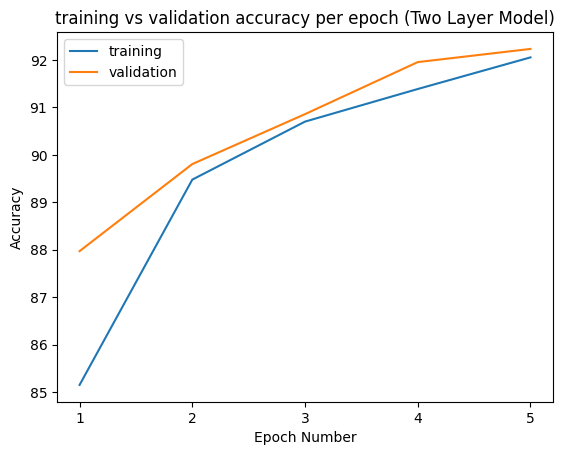

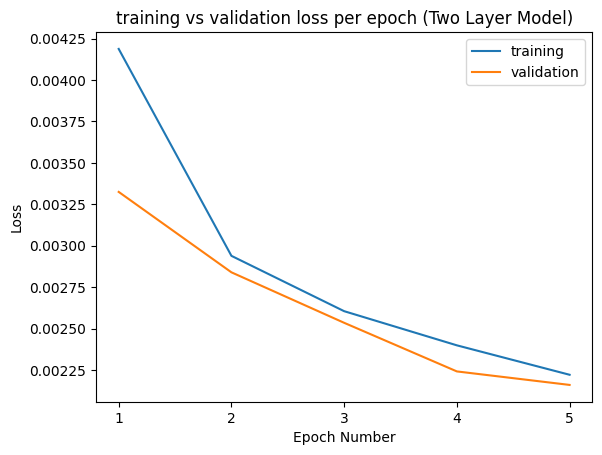

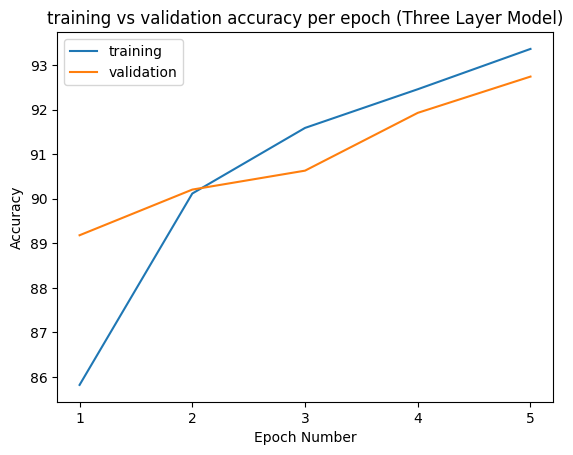

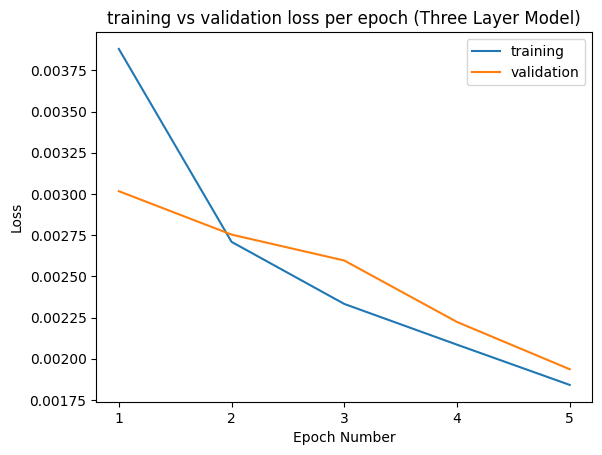

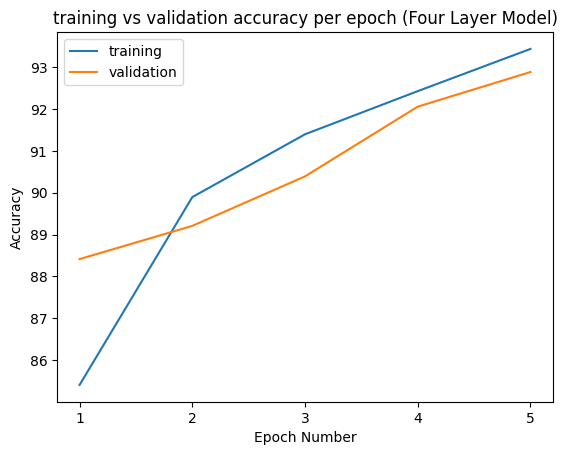

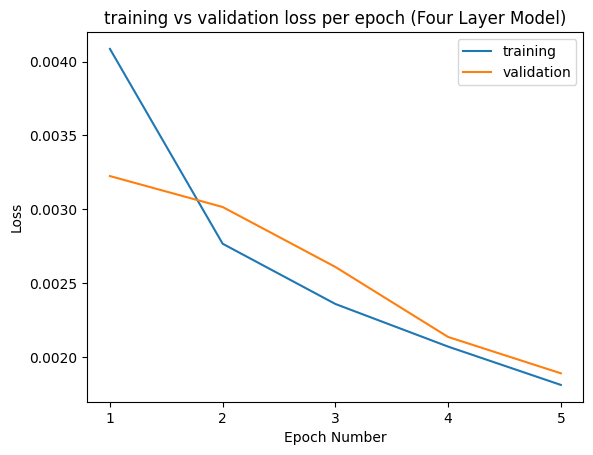

In [ ]:
plt.plot(range(1, num_epochs+1), mean_train_accuracy_two_layer, label="training")
plt.plot(range(1, num_epochs+1), mean_val_accuracy_two_layer, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('training vs validation accuracy per epoch (Two Layer Model)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_loss_two_layer, label="training")
plt.plot(range(1, num_epochs+1), mean_val_loss_two_layer, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('training vs validation loss per epoch (Two Layer Model)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_accuracy_three_layer, label="training")
plt.plot(range(1, num_epochs+1), mean_val_accuracy_three_layer, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('training vs validation accuracy per epoch (Three Layer Model)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_loss_three_layer, label="training")
plt.plot(range(1, num_epochs+1), mean_val_loss_three_layer, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('training vs validation loss per epoch (Three Layer Model)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_accuracy_four_layer, label="training")
plt.plot(range(1, num_epochs+1), mean_val_accuracy_four_layer, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('training vs validation accuracy per epoch (Four Layer Model)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_loss_four_layer, label="training")
plt.plot(range(1, num_epochs+1), mean_val_loss_four_layer, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('training vs validation loss per epoch (Four Layer Model)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

### Different Kernals

In [ ]:
results_small_kernel = [training(model, learning_rate[1]) for model in small_kernel_models]
results_medium_kernel = [training(model, learning_rate[1]) for model in medium_kernel_models]
results_large_kernel = [training(model, learning_rate[1]) for model in large_kernel_models]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
mean_train_accuracy_small_kernel = []
mean_train_loss_small_kernel = []
mean_val_accuracy_small_kernel = []
mean_val_loss_small_kernel = []

mean_train_accuracy_medium_kernel = []
mean_train_loss_medium_kernel = []
mean_val_accuracy_medium_kernel = []
mean_val_loss_medium_kernel = []

mean_train_accuracy_large_kernel = []
mean_train_loss_large_kernel = []
mean_val_accuracy_large_kernel = []
mean_val_loss_large_kernel = []

for i in range(num_epochs):
  mean_train_accuracy_small_kernel.append((results_small_kernel[0][0][i] + results_small_kernel[1][0][i] + results_small_kernel[2][0][i]) / 3)
  mean_train_loss_small_kernel.append((results_small_kernel[0][1][i] + results_small_kernel[1][1][i] + results_small_kernel[2][1][i]) / 3)
  mean_val_accuracy_small_kernel.append((results_small_kernel[0][2][i] + results_small_kernel[1][2][i] + results_small_kernel[2][2][i]) / 3)
  mean_val_loss_small_kernel.append((results_small_kernel[0][3][i] + results_small_kernel[1][3][i] + results_small_kernel[2][3][i]) / 3)

  mean_train_accuracy_medium_kernel.append((results_medium_kernel[0][0][i] + results_medium_kernel[1][0][i] + results_medium_kernel[2][0][i]) / 3)
  mean_train_loss_medium_kernel.append((results_medium_kernel[0][1][i] + results_medium_kernel[1][1][i] + results_medium_kernel[2][1][i]) / 3)
  mean_val_accuracy_medium_kernel.append((results_medium_kernel[0][2][i] + results_medium_kernel[1][2][i] + results_medium_kernel[2][2][i]) / 3)
  mean_val_loss_medium_kernel.append((results_medium_kernel[0][3][i] + results_medium_kernel[1][3][i] + results_medium_kernel[2][3][i]) / 3)

  mean_train_accuracy_large_kernel.append((results_large_kernel[0][0][i] + results_large_kernel[1][0][i] + results_large_kernel[2][0][i]) / 3)
  mean_train_loss_large_kernel.append((results_large_kernel[0][1][i] + results_large_kernel[1][1][i] + results_large_kernel[2][1][i]) / 3)
  mean_val_accuracy_large_kernel.append((results_large_kernel[0][2][i] + results_large_kernel[1][2][i] + results_large_kernel[2][2][i]) / 3)
  mean_val_loss_large_kernel.append((results_large_kernel[0][3][i] + results_large_kernel[1][3][i] + results_large_kernel[2][3][i]) / 3)


#### Data Display

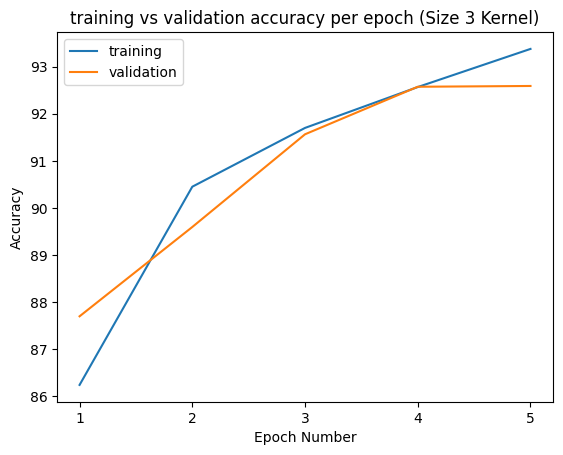

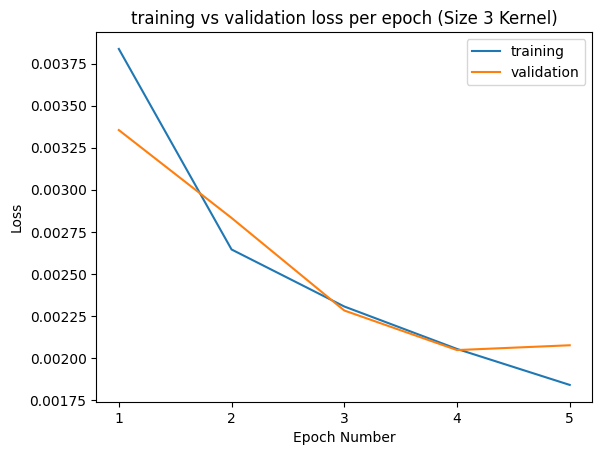

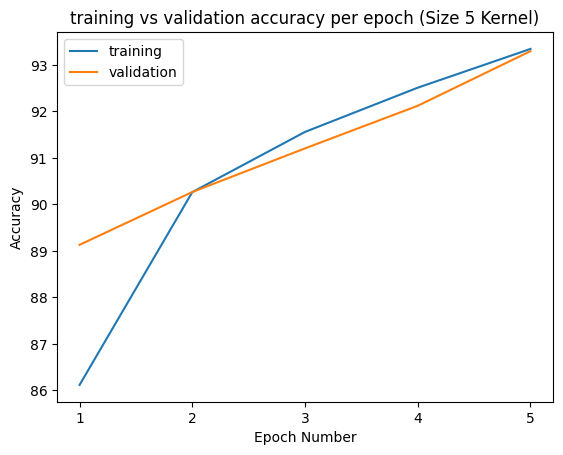

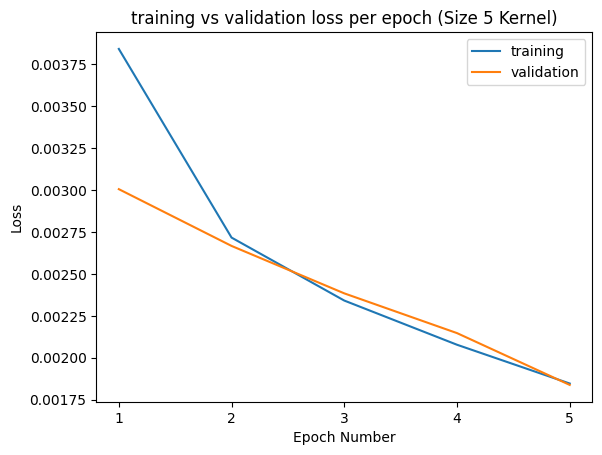

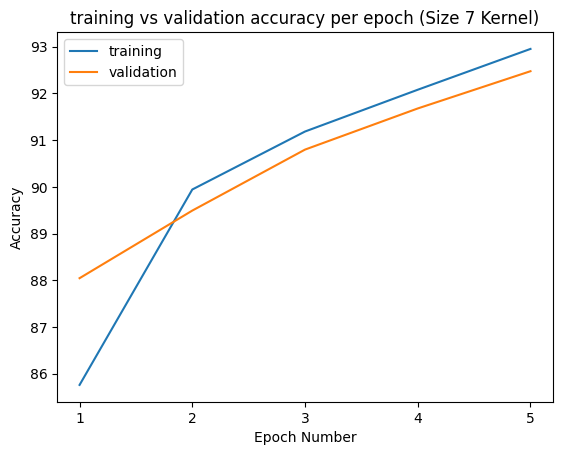

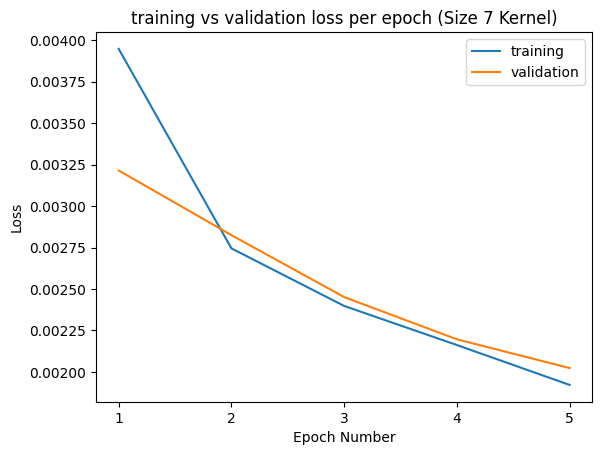

In [ ]:
LabelList = ["Size 3 Kernel", "Size 5 Kernel", "Size 7 Kernel"]

plt.plot(range(1, num_epochs+1), mean_train_accuracy_small_kernel, label="training")
plt.plot(range(1, num_epochs+1), mean_val_accuracy_small_kernel, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('training vs validation accuracy per epoch (Size 3 Kernel)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_loss_small_kernel, label="training")
plt.plot(range(1, num_epochs+1), mean_val_loss_small_kernel, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('training vs validation loss per epoch (Size 3 Kernel)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_accuracy_medium_kernel, label="training")
plt.plot(range(1, num_epochs+1), mean_val_accuracy_medium_kernel, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('training vs validation accuracy per epoch (Size 5 Kernel)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_loss_medium_kernel, label="training")
plt.plot(range(1, num_epochs+1), mean_val_loss_medium_kernel, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('training vs validation loss per epoch (Size 5 Kernel)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_accuracy_large_kernel, label="training")
plt.plot(range(1, num_epochs+1), mean_val_accuracy_large_kernel, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('training vs validation accuracy per epoch (Size 7 Kernel)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_loss_large_kernel, label="training")
plt.plot(range(1, num_epochs+1), mean_val_loss_large_kernel, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('training vs validation loss per epoch (Size 7 Kernel)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

### Different Learning Rate

In [ ]:
results_lowest_learning_rate = [training(model, learning_rate[1]) for model in lowest_learning_rate_models]
results_middle_learning_rate = [training(model, learning_rate[1]) for model in middle_learning_rate_models]
results_highest_learning_rate = [training(model, learning_rate[1]) for model in highest_learning_rate_models]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

In [ ]:
len(results_lowest_learning_rate)

3

In [ ]:
mean_train_accuracy_lowest_learning_rate = []
mean_train_loss_lowest_learning_rate = []
mean_val_accuracy_lowest_learning_rate = []
mean_val_loss_lowest_learning_rate = []

mean_train_accuracy_middle_learning_rate = []
mean_train_loss_middle_learning_rate = []
mean_val_accuracy_middle_learning_rate = []
mean_val_loss_middle_learning_rate = []

mean_train_accuracy_highest_learning_rate = []
mean_train_loss_highest_learning_rate = []
mean_val_accuracy_highest_learning_rate = []
mean_val_loss_highest_learning_rate = []

for i in range(num_epochs):
  mean_train_accuracy_lowest_learning_rate.append((results_lowest_learning_rate[0][0][i] + results_lowest_learning_rate[1][0][i] + results_lowest_learning_rate[2][0][i]) / 3)
  mean_train_loss_lowest_learning_rate.append((results_lowest_learning_rate[0][1][i] + results_lowest_learning_rate[1][1][i] + results_lowest_learning_rate[2][1][i]) / 3)
  mean_val_accuracy_lowest_learning_rate.append((results_lowest_learning_rate[0][2][i] + results_lowest_learning_rate[1][2][i] + results_lowest_learning_rate[2][2][i]) / 3)
  mean_val_loss_lowest_learning_rate.append((results_lowest_learning_rate[0][3][i] + results_lowest_learning_rate[1][3][i] + results_lowest_learning_rate[2][3][i]) / 3)

  mean_train_accuracy_middle_learning_rate.append((results_middle_learning_rate[0][0][i] + results_middle_learning_rate[1][0][i] + results_middle_learning_rate[2][0][i]) / 3)
  mean_train_loss_middle_learning_rate.append((results_middle_learning_rate[0][1][i] + results_middle_learning_rate[1][1][i] + results_middle_learning_rate[2][1][i]) / 3)
  mean_val_accuracy_middle_learning_rate.append((results_middle_learning_rate[0][2][i] + results_middle_learning_rate[1][2][i] + results_middle_learning_rate[2][2][i]) / 3)
  mean_val_loss_middle_learning_rate.append((results_middle_learning_rate[0][3][i] + results_middle_learning_rate[1][3][i] + results_middle_learning_rate[2][3][i]) / 3)

  mean_train_accuracy_highest_learning_rate.append((results_highest_learning_rate[0][0][i] + results_highest_learning_rate[1][0][i] + results_highest_learning_rate[2][0][i]) / 3)
  mean_train_loss_highest_learning_rate.append((results_highest_learning_rate[0][1][i] + results_highest_learning_rate[1][1][i] + results_highest_learning_rate[2][1][i]) / 3)
  mean_val_accuracy_highest_learning_rate.append((results_highest_learning_rate[0][2][i] + results_highest_learning_rate[1][2][i] + results_highest_learning_rate[2][2][i]) / 3)
  mean_val_loss_highest_learning_rate.append((results_highest_learning_rate[0][3][i] + results_highest_learning_rate[1][3][i] + results_highest_learning_rate[2][3][i]) / 3)

#### Data Display

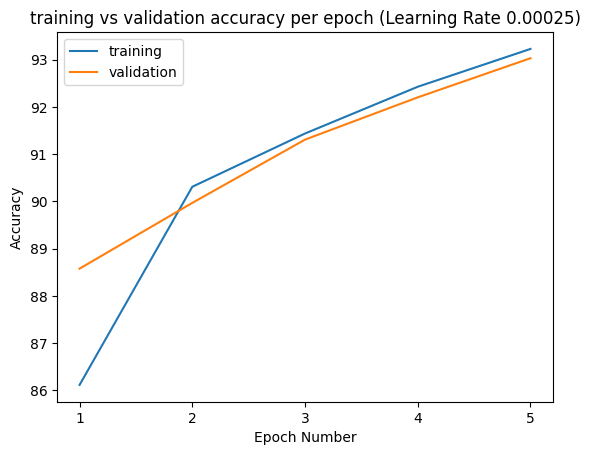

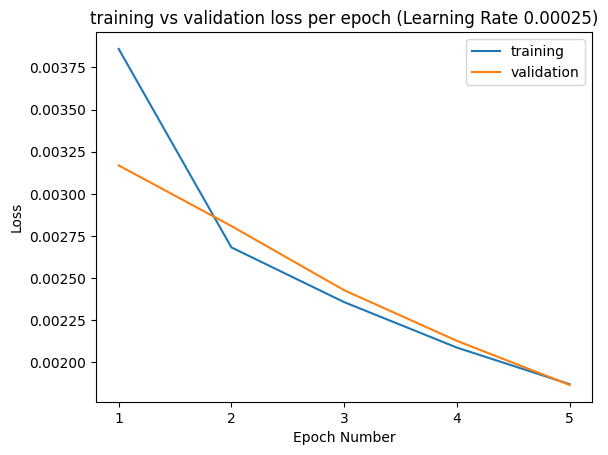

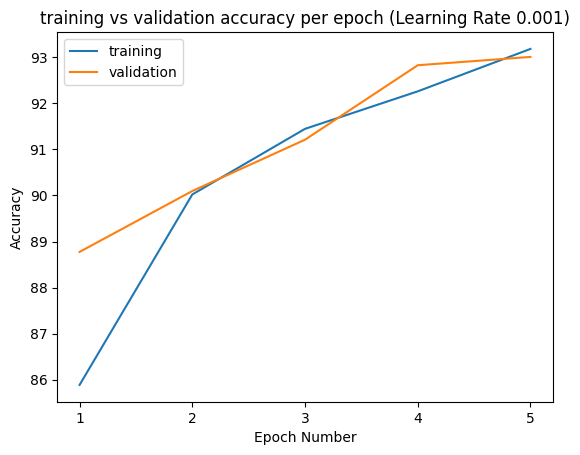

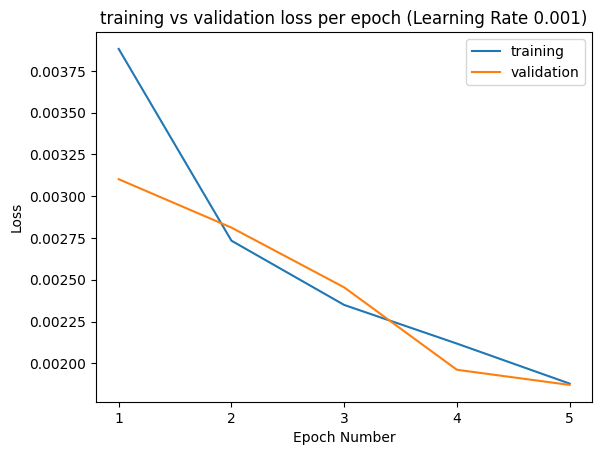

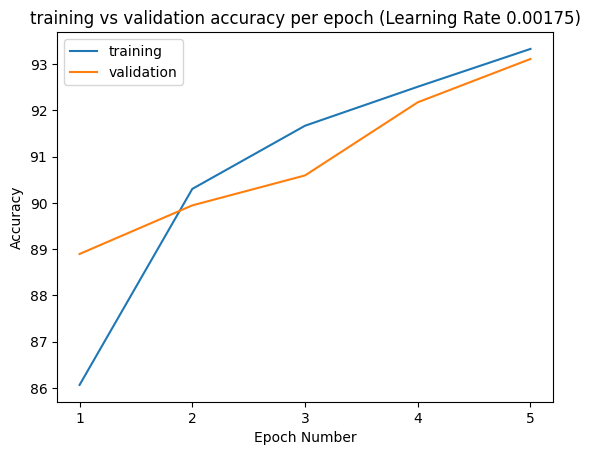

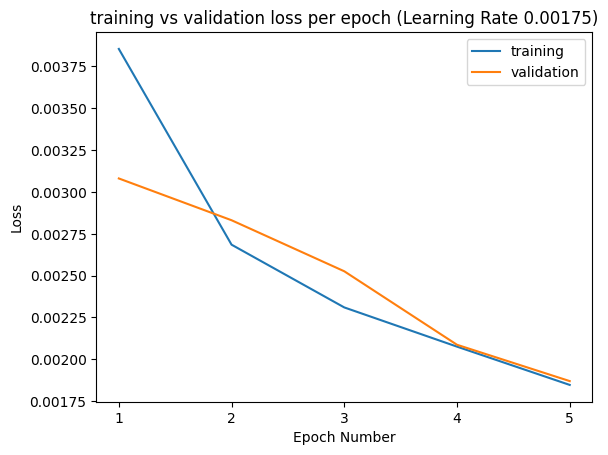

In [ ]:
plt.plot(range(1, num_epochs+1), mean_train_accuracy_lowest_learning_rate, label="training")
plt.plot(range(1, num_epochs+1), mean_val_accuracy_lowest_learning_rate, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('training vs validation accuracy per epoch (Learning Rate 0.00025)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_loss_lowest_learning_rate, label="training")
plt.plot(range(1, num_epochs+1), mean_val_loss_lowest_learning_rate, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('training vs validation loss per epoch (Learning Rate 0.00025)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_accuracy_middle_learning_rate, label="training")
plt.plot(range(1, num_epochs+1), mean_val_accuracy_middle_learning_rate, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('training vs validation accuracy per epoch (Learning Rate 0.001)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_loss_middle_learning_rate, label="training")
plt.plot(range(1, num_epochs+1), mean_val_loss_middle_learning_rate, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('training vs validation loss per epoch (Learning Rate 0.001)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_accuracy_highest_learning_rate, label="training")
plt.plot(range(1, num_epochs+1), mean_val_accuracy_highest_learning_rate, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('training vs validation accuracy per epoch (Learning Rate 0.00175)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), mean_train_loss_highest_learning_rate, label="training")
plt.plot(range(1, num_epochs+1), mean_val_loss_highest_learning_rate, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('training vs validation loss per epoch (Learning Rate 0.00175)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()



---

## Running the test data through the model and generating graphs

---



In [ ]:
def evaluatemodel(model, dataset):
  model.eval()
  with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in notebook.tqdm(dataset):
      images = images.to(device)
      labels = labels.to(device)
      outputs = model(images)
      _, predicted = torch.max(outputs.data, 1)
      total += labels.size(0)
      correct += (predicted == labels).sum().item()
  print('Accuracy of the network on the 10000 test images: {} %'.format(100 * correct / total))
  return (100 * correct / total)

In [ ]:
accuracies_two_layer = [evaluatemodel(model, test_loader) for model in two_layer_models]
accuracies_three_layer = [evaluatemodel(model, test_loader) for model in three_layer_models]
accuracies_four_layer = [evaluatemodel(model, test_loader) for model in four_layer_models]

accuracies_small_kernel = [evaluatemodel(model, test_loader) for model in small_kernel_models]
accuracies_medium_kernel = [evaluatemodel(model, test_loader) for model in medium_kernel_models]
accuracies_large_kernel = [evaluatemodel(model, test_loader) for model in large_kernel_models]

accuracies_lowest_learning_rate = [evaluatemodel(model, test_loader) for model in lowest_learning_rate_models]
accuracies_middle_learning_rate = [evaluatemodel(model, test_loader) for model in middle_learning_rate_models]
accuracies_highest_learning_rate = [evaluatemodel(model, test_loader) for model in highest_learning_rate_models]

  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.99 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.24 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.26 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.93 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.17 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.19 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.87 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.67 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.47 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.83 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.13 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.74 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.99 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.88 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 91.14 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.55 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 89.57 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.14 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.89 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.8 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.24 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.75 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 88.95 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.83 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.03 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.32 %


  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.54 %


In [ ]:
two_layer_accuracy = sum(accuracies_two_layer) / 3
three_layer_accuracy = sum(accuracies_three_layer) / 3
four_layer_accuracy = sum(accuracies_four_layer) / 3

small_kernel_accuracy = sum(accuracies_small_kernel) / 3
medium_kernel_accuracy = sum(accuracies_medium_kernel) / 3
large_kernel_accuracy = sum(accuracies_large_kernel) / 3

lowest_learning_rate_accuracy = sum(accuracies_lowest_learning_rate) / 3
medium_learning_rate_accuracy = sum(accuracies_middle_learning_rate) / 3
highest_learning_rate_accuracy = sum(accuracies_highest_learning_rate) / 3

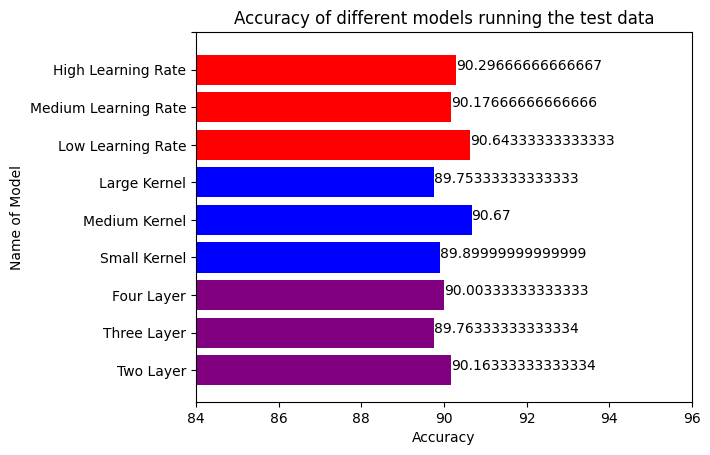

In [ ]:
y = ["Two Layer", "Three Layer", "Four Layer",
         "Small Kernel", "Medium Kernel", "Large Kernel",
         "Low Learning Rate", "Medium Learning Rate", "High Learning Rate"]

x = [two_layer_accuracy, three_layer_accuracy, four_layer_accuracy,
         small_kernel_accuracy, medium_kernel_accuracy, large_kernel_accuracy,
         lowest_learning_rate_accuracy, medium_learning_rate_accuracy, highest_learning_rate_accuracy]

plt.barh(y, x, color=['purple', 'purple', 'purple',
                      'blue', 'blue', 'blue',
                      'red', 'red', 'red'])
plt.ylabel('Name of Model')
plt.xlabel('Accuracy')
plt.title('Accuracy of different models running the test data')
plt.yticks(range(0,10))
plt.xlim(84, 96)

for index, value in enumerate(x):
    plt.text(value, index,
             str(value))

plt.show()

Constructing the best convolutional network with the best hyperparameters from testing

In [ ]:
# The best Convolutional Network

class BestConvNet(nn.Module):
  def __init__(self, num_classes):
    super().__init__()

    self.layer1 = nn.Sequential(
        nn.Conv2d(1, 16, kernel_size=kernel[1], stride=1, padding=2),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer2 = nn.Sequential(
        nn.Conv2d(16, 32, kernel_size=kernel[1], stride=1, padding=2),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2))
    
    self.layer3 = nn.Sequential(
        nn.Conv2d(32, 64, kernel_size=kernel[1], stride=1, padding=2),
        nn.BatchNorm2d(64),
        nn.ReLU())
    
    self.layer4 = nn.Sequential(
        nn.Conv2d(64, 128, kernel_size=kernel[1], stride=1, padding=2),
        nn.BatchNorm2d(128),
        nn.ReLU())
    
    self.fc = nn.Linear(3136, num_classes)
        
  def normalize(self, images):
    std, mean = torch.std_mean(images, dim=(2, 3), keepdim=True)
    return (images - mean) / std

  def forward(self, x):
    out = self.normalize(x)
    out = self.layer1(out)
    out = self.layer2(out)
    out = self.layer3(out)
    out = out.reshape(out.size(0), -1)
    out = self.fc(out)
    
    return out

best_model = BestConvNet(num_classes).to(device)

## Training and evaluating the best model

In [ ]:
# Training the best model

train_accuracy_array = []
train_loss_array = []
val_accuracy_array = []
val_loss_array = []

train_accuracy, train_loss, val_accuracy, val_loss = training(best_model, learning_rate[0])
train_accuracy_array.append(train_accuracy)
train_loss_array.append(train_loss)
val_accuracy_array.append(val_accuracy)
val_loss_array.append(val_loss)

  0%|          | 0/5 [00:00<?, ?it/s]

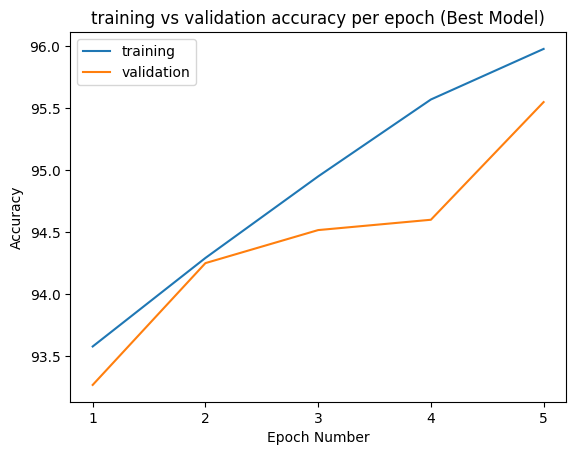

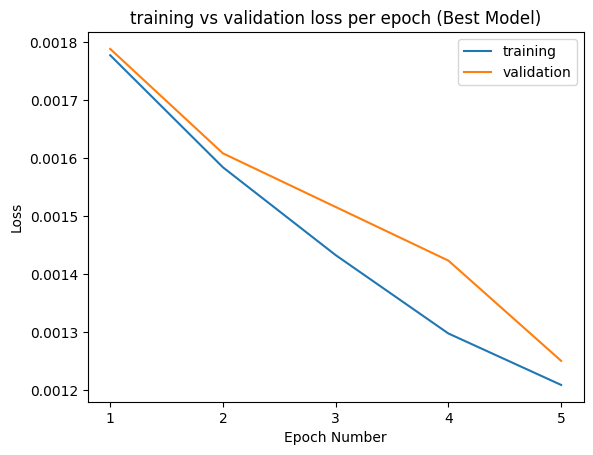

In [ ]:
plt.plot(range(1, num_epochs+1), train_accuracy, label="training")
plt.plot(range(1, num_epochs+1), val_accuracy, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.title('training vs validation accuracy per epoch (Best Model)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

plt.plot(range(1, num_epochs+1), train_loss, label="training")
plt.plot(range(1, num_epochs+1), val_loss, label="validation")
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.title('training vs validation loss per epoch (Best Model)')
plt.xticks(range(1, num_epochs+1))
plt.legend()
plt.show()

In [ ]:
best_accuracy = evaluatemodel(best_model, test_loader)

  0%|          | 0/100 [00:00<?, ?it/s]

Accuracy of the network on the 10000 test images: 90.38 %


## Comparison against Resnet-18

In [ ]:
def normalize(images):
    std, mean = torch.std_mean(images, dim=(2, 3), keepdim=True)
    return (images - mean) / std

Initial setup for comparisons

In [ ]:
resnet18 = torchvision.models.resnet18(weights='DEFAULT').eval()

resnet_loader = torch.utils.data.DataLoader(
    dataset=test_dataset,
    batch_size=1,
    shuffle=False
)

samples = ([], [], [], [], [], [], [], [], [], [])
for i, (images, labels) in enumerate(resnet_loader):
  if len(samples[labels]) < 100:
    samples[labels].append(normalize(images))

Analyse the ResNet-18 model

In [ ]:
# get the average representation of what each label from the sample set
average_representations = ()
for label in samples:
  representations = torch.tensor([])
  for image in label:
    three_channel_image = torch.cat((image, image, image), dim=1)
    representation = resnet18(three_channel_image)
    representations = torch.cat((representations, representation), dim=0)
  average_representation = torch.mean(representations, dim=0)
  average_representations = average_representations + (average_representation,)
average_representations = torch.stack(average_representations)
torch.corrcoef(average_representations)

tensor([[1.0000, 0.8971, 0.9418, 0.9300, 0.9546, 0.4564, 0.9681, 0.4610, 0.9175, 0.6669],
        [0.8971, 1.0000, 0.8607, 0.9177, 0.8656, 0.4772, 0.8757, 0.4525, 0.8448, 0.6381],
        [0.9418, 0.8607, 1.0000, 0.8333, 0.9567, 0.4135, 0.9467, 0.3946, 0.9240, 0.5707],
        [0.9300, 0.9177, 0.8333, 1.0000, 0.8815, 0.5744, 0.9180, 0.4978, 0.8605, 0.6959],
        [0.9546, 0.8656, 0.9567, 0.8815, 1.0000, 0.3865, 0.9595, 0.4126, 0.8885, 0.6148],
        [0.4564, 0.4772, 0.4135, 0.5744, 0.3865, 1.0000, 0.5270, 0.8224, 0.6174, 0.6681],
        [0.9681, 0.8757, 0.9467, 0.9180, 0.9595, 0.5270, 1.0000, 0.5026, 0.9206, 0.6578],
        [0.4610, 0.4525, 0.3946, 0.4978, 0.4126, 0.8224, 0.5026, 1.0000, 0.6015, 0.8480],
        [0.9175, 0.8448, 0.9240, 0.8605, 0.8885, 0.6174, 0.9206, 0.6015, 1.0000, 0.7461],
        [0.6669, 0.6381, 0.5707, 0.6959, 0.6148, 0.6681, 0.6578, 0.8480, 0.7461, 1.0000]], grad_fn=<ClampBackward1>)

Analyse my model

In [ ]:
# get the average representation of what each label from the sample set
average_representations = ()
for label in samples:
  representations = torch.tensor([])
  for image in label:
    representation = best_model(image.to(device)).cpu()
    representations = torch.cat((representations, representation), dim=0)
  average_representation = torch.mean(representations, dim=0)
  average_representations = average_representations + (average_representation,)
average_representations = torch.stack(average_representations)
torch.corrcoef(average_representations)

tensor([[ 1.0000,  0.0807,  0.7742,  0.6217,  0.5363, -0.0488,  0.8069, -0.2879,  0.2118, -0.3688],
        [ 0.0807,  1.0000,  0.0088,  0.2438,  0.1217, -0.5749,  0.0577, -0.5534, -0.2021, -0.4963],
        [ 0.7742,  0.0088,  1.0000,  0.5098,  0.8384, -0.1473,  0.8798, -0.4111,  0.1036, -0.4570],
        [ 0.6217,  0.2438,  0.5098,  1.0000,  0.4385, -0.4714,  0.6184, -0.4744, -0.0109, -0.5207],
        [ 0.5363,  0.1217,  0.8384,  0.4385,  1.0000, -0.4648,  0.8500, -0.5964,  0.1864, -0.6116],
        [-0.0488, -0.5749, -0.1473, -0.4714, -0.4648,  1.0000, -0.3152,  0.5166, -0.1190,  0.3934],
        [ 0.8069,  0.0577,  0.8798,  0.6184,  0.8500, -0.3152,  1.0000, -0.5441,  0.2212, -0.5681],
        [-0.2879, -0.5534, -0.4111, -0.4744, -0.5964,  0.5166, -0.5441,  1.0000, -0.0900,  0.6579],
        [ 0.2118, -0.2021,  0.1036, -0.0109,  0.1864, -0.1190,  0.2212, -0.0900,  1.0000, -0.1839],
        [-0.3688, -0.4963, -0.4570, -0.5207, -0.6116,  0.3934, -0.5681,  0.6579, -0.1839,  1.0000]],